In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
data=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [6]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

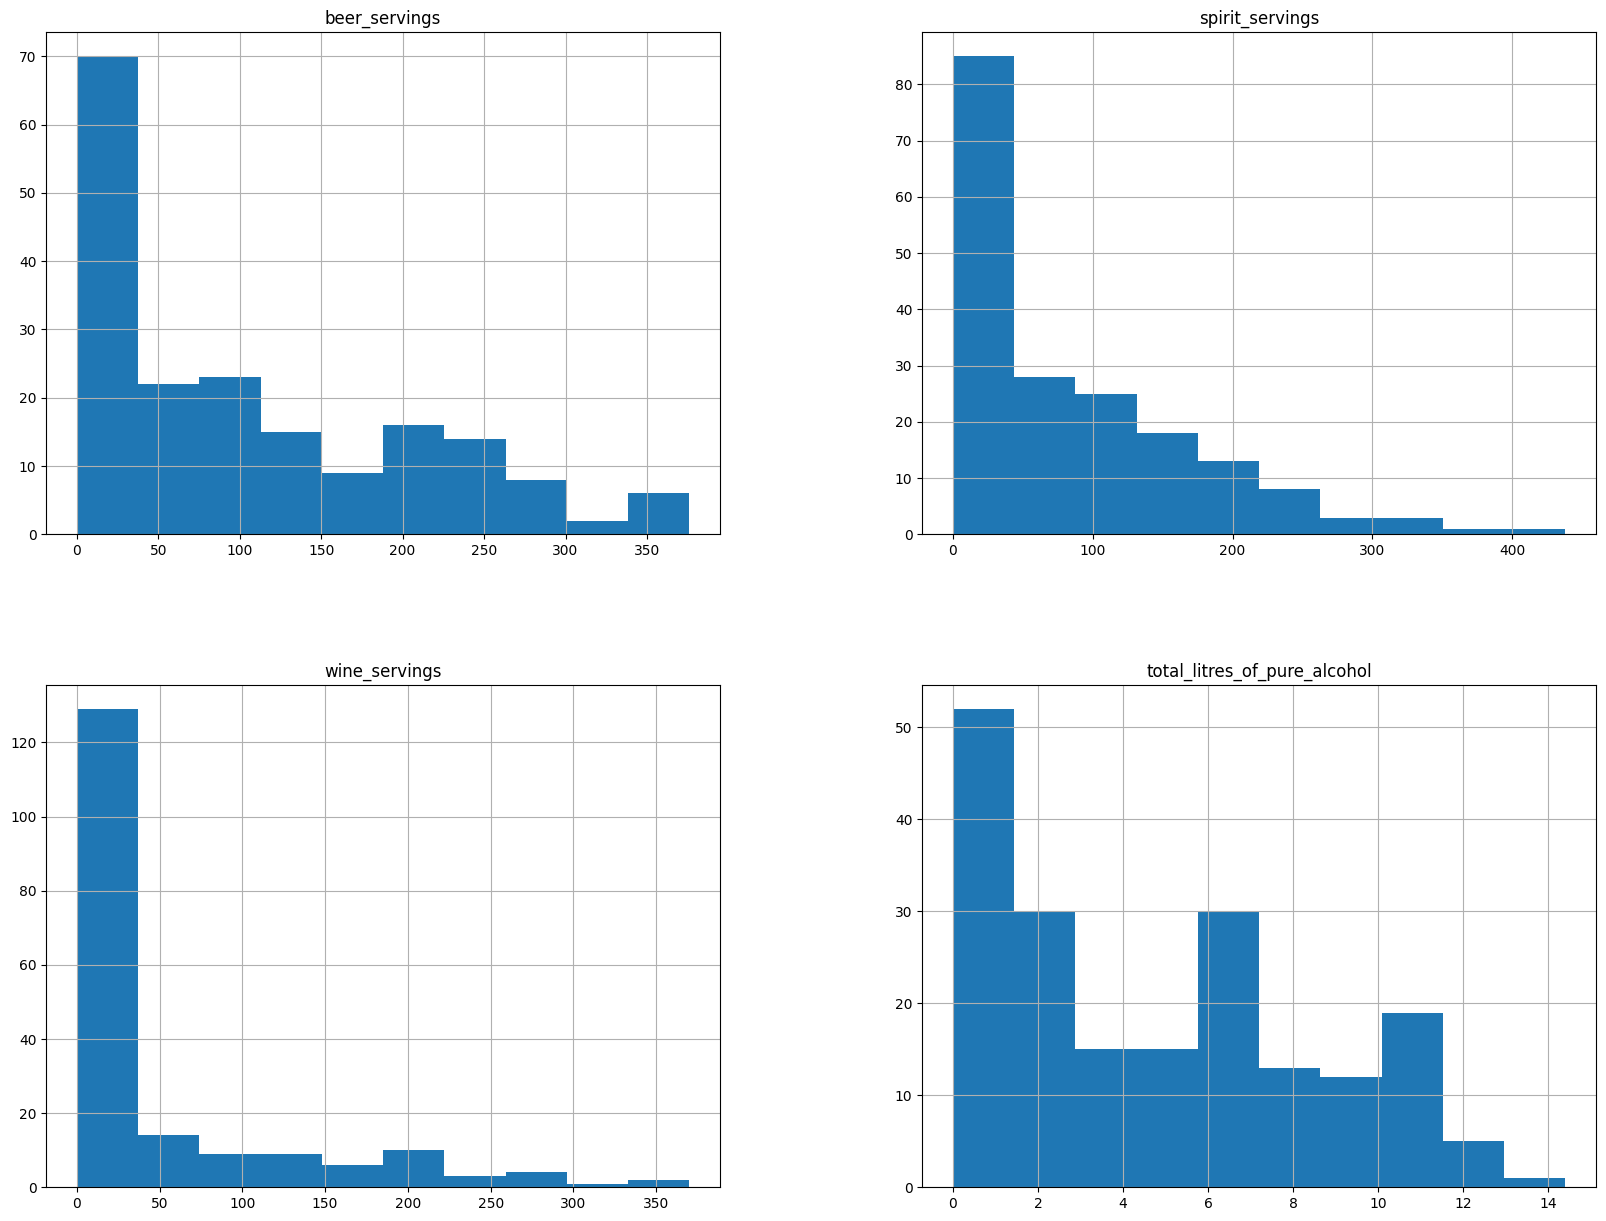

In [23]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

we know that it is a skewed data so zscore is not applicable

In [34]:
from scipy.stats import zscore

In [43]:
z_scores_spirit = zscore(data['spirit_servings'])

In [44]:
z_scores_spirit

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
188   NaN
189   NaN
190   NaN
191   NaN
192   NaN
Name: spirit_servings, Length: 193, dtype: float64

In [46]:
z_scores_wine = zscore(data['wine_servings'])

In [42]:
z_scores_wine

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
188   NaN
189   NaN
190   NaN
191   NaN
192   NaN
Name: wine_servings, Length: 193, dtype: float64

In [54]:
threshold=5

In [55]:
outliers_spirit = data.loc[np.abs(z_scores_spirit) > threshold, 'spirit_servings']

In [56]:
print("Outliers in 'spirit_servings' column:")
print(outliers_spirit)

Outliers in 'spirit_servings' column:
Series([], Name: spirit_servings, dtype: float64)


In [59]:
outliers_wine = data.loc[np.abs(z_scores_wine) > threshold, 'wine_servings']

In [61]:
print("Outliers in 'wine_servings' column:")
print(outliers_wine)

Outliers in 'wine_servings' column:
Series([], Name: wine_servings, dtype: float64)
